# ChiliLado Data Analytics and Machine Learning - Group 8
Table of Content:

Step 1: Acquire the dataset

Step 2: Import the libraries

Step 3: Import the dataset

Step 4a: Feature Selection (For customer flow and sales)

Step 5a: Clean the data by dentifying and handling missing value, redundancy and outliers

Step 6a: Encode the categorical data

Step 7a: Feature Scaling

Step 8a: Spliting dataset, training and accurancy

Step 4b: Feature Selection (For new customer and repeat customer)

Step 5b: Clean the data by dentifying and handling missing value, redundancy and outliers

Step 6b: Encode the categorical data

Step 7b: Feature Scaling

Step 8b: Spliting dataset, training and accurancy

Step 9: Combine both Multiple Linear Regression as one

Step 10: Random Forest Model

The Flowchart of our work are shown in the diagram below

![FlowChart](ChiliLadoData/FlowChart.png)

# Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided from Wei Shen where he gotten it from Mr.Afiq, who is the founder of Chili Lado.

We decided not to use all the datasets in this google drive, however, we only selected the datasets that are relevant to our analysis. The selected the Product Overview datasets from the Product Folder. 

At first we downloaded all the dataset into our local drive by using the dowload all button.

![DownloadAll](ChiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zipped file.

![ZippedFile](ChiliLadoData/ZippedFile.png)
![DownloadedFile](ChiliLadoData/DownloadedFile.png)

Based on our observation, the zip include the Product Overview dataset which is from May 2023 to September 2023. All of them has 22 Column, however it has different number of rows. May, June, July, August, September has 32,31,32,32,31 rows respectively. The column names are:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 files together, however we decided to do it with copy and paste instead of using python code because it only has 5 files. We use Ctrl+C to copy all the rows and use Ctrl+V to paste the copied rows into a new Excel File called MergedFile.xlsx.

![CopiedFile](ChiliLadoData/CopiedFile.png)

![PasteFile](ChiliLadoData/PasteFile.png)

We copied all five datasets into the MergedFile. However, for May 2023, we copy the whole file including the column names, while for other months,we only copied the data. We pasted the data beneath May 2023. We followed the same process for July 2023 and subsequent months.

![MayJune](ChiliLadoData/MayJune.png)

To check if the data is merged correctly, we calculate the total number of rows by adding the number of days in these 5 months and the row contains attribute name which is 31 + 30 + 31 + 31 + + 30 + 1 = 154, as our MergedFile has 154 rows means that we had merged it correctly.

To fulfill our objective, we require a different set of data sourced from the Dashboard of the year 2023.

![Dashboard2023](ChiliLadoData/Dashboard2023.png)

We get these following columns:

1. Numbers of buyers
2. Numbers of new buyers
3. Numbers of existing buyers

We replicate the procedure by copying the column and its data as the method above. Then, we paste this data into our recently created merged file.

![AddedColumn](ChiliLadoData/AddedColumn.png)

We found out that the figures in repeat purchase rate numbers are inaccurate. So, We perform data augmentation for two columns: the percentage of new buyers and the percentage of repeat buyers by using the data inside the dataset and Excel Function.

![NewCalculation](ChiliLadoData/NewCalculation.png)

![RepeatCalculation](ChiliLadoData/RepeatCalculation.png)

We use If in our calculation because if the number of buyer is equal to zero, it might have division by zero error. If the number of buyers equals zero, the output is set to zero, otherwise, the division operation proceeds.  We also convert our calculation to percentage by using this function.

![Percentage](ChiliLadoData/Percentage.png)

We decide to use all these steps in Excel rather in Python because it is faster than code, also we want to make direct changes to our dataset rather than temporary changes only.

We have 27 column and 154 rows inside the dataset. 

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](ChiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](ChiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing.

We've also converted the date column to ensure Python recognizes it as a date, preventing unintentional calculations. This format ensures proper identification as a date type without triggering any unwanted error.

![Date](ChiliLadoData/Date.png)

Now the data can be used for the next few steps.


# Step 2: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

# Step 3: Import the dataset

We imported the datasets from a local directory. We create a folder called ChiliLadoData and store all the datasets and images we use in that folder.

In [2]:
df = pd.read_excel('MergedFile.xlsx')

# print info to show the info of the Excel file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   153 non-null    datetime64[ns]
 1   Product Visitors (Visit)               153 non-null    int64         
 2   Product Page Views                     153 non-null    int64         
 3   Items Visited                          153 non-null    int64         
 4   Product Bounce Visitors                153 non-null    int64         
 5   Product Bounce Rate                    153 non-null    float64       
 6   Search Clicks                          153 non-null    int64         
 7   Likes                                  153 non-null    int64         
 8   Product Visitors (Add to Cart)         153 non-null    int64         
 9   Units (Add to Cart)                    153 non-null    int64     

In [3]:
# Use print df to show the dataset
print(df)

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                         1                   1              1  \
1   2023-05-02                         3                   6              1   
2   2023-05-03                         4                   7              1   
3   2023-05-04                         1                   3              1   
4   2023-05-05                         3                  10              1   
..         ...                       ...                 ...            ...   
148 2023-09-26                       222                 497              1   
149 2023-09-27                       140                 284              3   
150 2023-09-28                       150                 359              3   
151 2023-09-29                       149                 275              1   
152 2023-09-30                       121                 232              1   

     Product Bounce Visitors  Product Bounce Rate  

# Step 4a: Feature Selection
The objective of our assignment is to increase sales of chililado. However, there are many ways to increase sales. So, we opt for the most important element data in our dataset, which is to analyse customer behaviour. First is the number of customer visting chilidado (human flow) and the number of sales by using Multiple Linear Regression. Another way to increase sales is to determine the number of return customer and sales by using Single Linear Regression and Multiple Linear Regression. Finally we combine all factor together using neural network and Multiple Linear Regression.

Instead of doing alltogether

For Part a, the analysis will be customer flow and the number of sales

In [4]:
# DataFrame for objective 1
df1 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Bounce Visitors', 'Product Bounce Rate','Likes', 'Product Visitors (Add to Cart)',
       'Units (Add to Cart)', 'Conversion Rate (Add to Cart)','Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed',
       'Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)','Buyers (Confirmed Order)', 'Units (Confirmed Order)',
       'Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)', 'Numbers of buyers',
       'Numbers of new buyers', 'Numbers of existing buyers','Percentage of new buyers', 'Percentage of repeat buyers']

df1.drop(columns=drop_columns, inplace=True)

display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1,1,1,0,0.00
1,2023-05-02,3,6,1,1,58.90
2,2023-05-03,4,7,1,3,0.00
3,2023-05-04,1,3,1,1,0.00
4,2023-05-05,3,10,1,2,0.00
...,...,...,...,...,...,...
148,2023-09-26,222,497,1,67,1305.30
149,2023-09-27,140,284,3,30,502.69
150,2023-09-28,150,359,3,41,629.92
151,2023-09-29,149,275,1,30,433.53


# Step 5a: Clean the data by identifying and handling missing value, redundancy and outliers
After careful consideration, we have opted for imputation as our preferred method for handling outliers instead of removing rows for handling outliers. This decision was made after experimenting with row removal, which resulted in the elimination of 50 rows from our already small dataset. Given the trade-off between having a more accurate but smaller dataset versus imputing outliers and retaining more data, we have prioritized preserving a larger dataset for analysis. This choice aims to strike a balance between data accuracy and quantity, acknowledging the importance of maximizing information while mitigating the impact of outliers on our analysis.

In [5]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df1.isna().sum())

Find missing value of each column using isna()
Date                             0
Product Visitors (Visit)         0
Product Page Views               0
Items Visited                    0
Search Clicks                    0
Sales (Confirmed Order) (MYR)    0
dtype: int64


Based on above output, we found out that there are no missing value in the dataset, so we do not need to delete or drop any row.

In [6]:
#Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df1.duplicated().sum()
duplicate_columns = df1.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are no duplicate data in this dataset, so there are no redundancy.

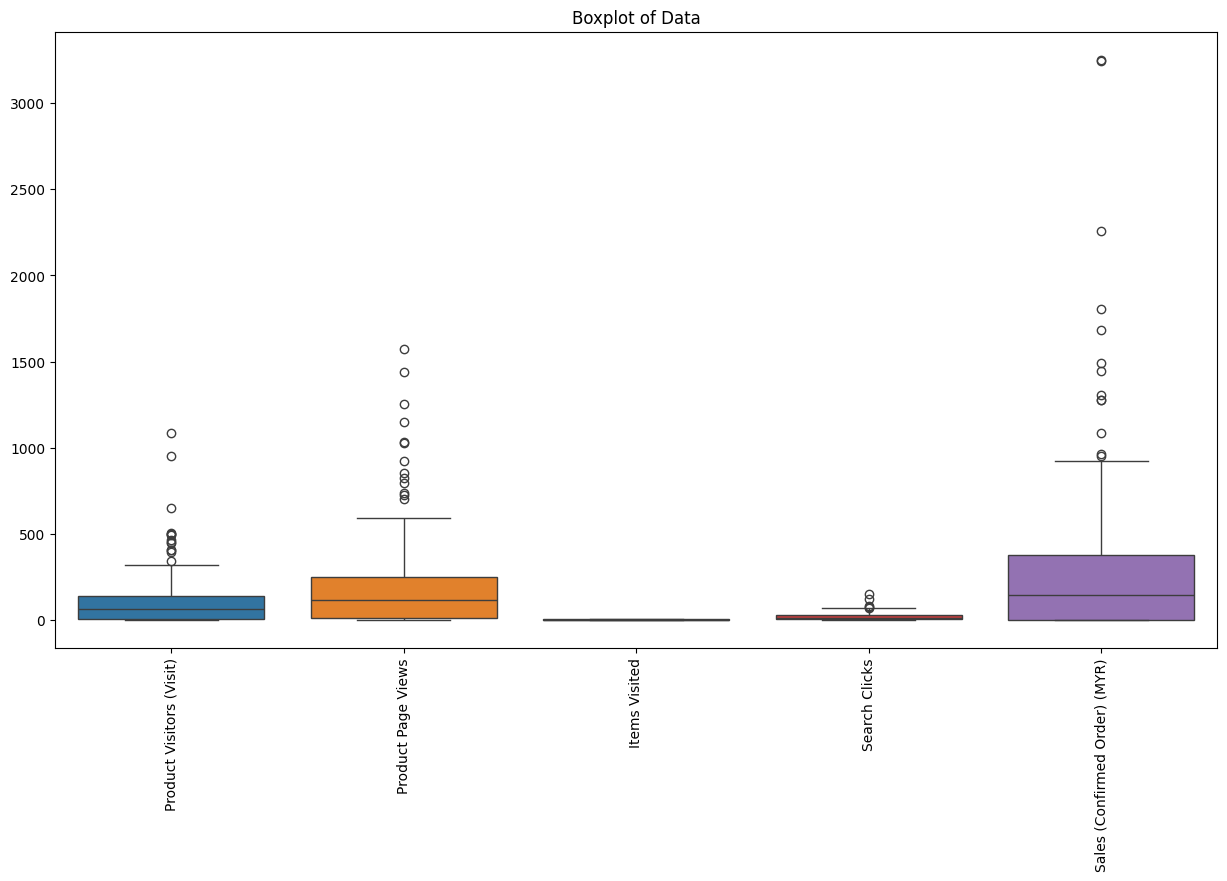

In [7]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf = df1.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot that used to identify the outliers in the datasets.


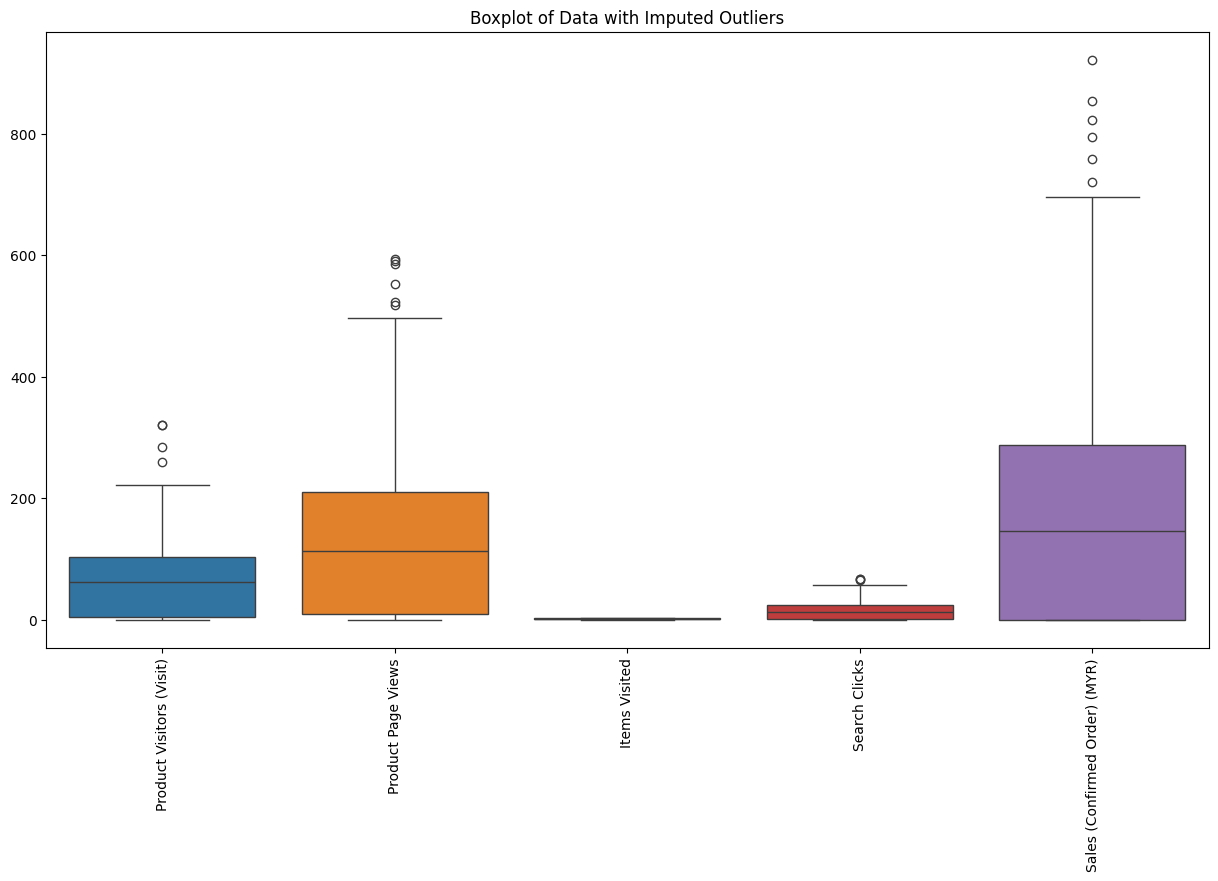

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'outliersdf' is your original DataFrame

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf, q1, q3, iqr):
    for col in outliersdf.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf[col] = np.where((outliersdf[col] < lower_bound) | (outliersdf[col] > upper_bound), median_value, outliersdf[col])
    return outliersdf

# Impute outliers in the DataFrame
df_imputed = impute_outlier_with_median(outliersdf.copy(), Q1, Q3, IQR)


df1 = df_imputed.copy()
# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed)
plt.title("Boxplot of Data with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()


The above figure is the boxplot of the dataset after detection and removal of outliers.

In [9]:
#Now you can display df1 with cleaned data
display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1.0,1.0,1.0,0.0,0.00
1,2023-05-02,3.0,6.0,1.0,1.0,58.90
2,2023-05-03,4.0,7.0,1.0,3.0,0.00
3,2023-05-04,1.0,3.0,1.0,1.0,0.00
4,2023-05-05,3.0,10.0,1.0,2.0,0.00
...,...,...,...,...,...,...
148,2023-09-26,222.0,497.0,1.0,67.0,145.60
149,2023-09-27,140.0,284.0,3.0,30.0,502.69
150,2023-09-28,150.0,359.0,3.0,41.0,629.92
151,2023-09-29,149.0,275.0,1.0,30.0,433.53


The numbers of row does not decrease as we choose imputation instead of removal of outliers

# Step 6a: Encode the categorical data

In [10]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes
print(df1.dtypes)

Date                             datetime64[ns]
Product Visitors (Visit)                float64
Product Page Views                      float64
Items Visited                           float64
Search Clicks                           float64
Sales (Confirmed Order) (MYR)           float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 7a: Feature Scaling
Scale down the numbers in the dataset.

We chose MinMaxScaler over other scaling methods due to its range from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

In [11]:
# Extract the date column
from sklearn.preprocessing import MinMaxScaler


date_column = df1.iloc[:, 0]

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df1.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df1.columns[1:])
minmax_frame.insert(0, df1.columns[0], date_column)

# Print the first few rows
print(minmax_frame)

df1 = minmax_frame

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                  0.003115            0.001684       0.333333  \
1   2023-05-02                  0.009346            0.010101       0.333333   
2   2023-05-03                  0.012461            0.011785       0.333333   
3   2023-05-04                  0.003115            0.005051       0.333333   
4   2023-05-05                  0.009346            0.016835       0.333333   
..         ...                       ...                 ...            ...   
148 2023-09-26                  0.691589            0.836700       0.333333   
149 2023-09-27                  0.436137            0.478114       1.000000   
150 2023-09-28                  0.467290            0.604377       1.000000   
151 2023-09-29                  0.464174            0.462963       0.333333   
152 2023-09-30                  0.376947            0.390572       0.333333   

     Search Clicks  Sales (Confirmed Order) (MYR)  

# Step 8a: Splitting the dataset, training and accuracy

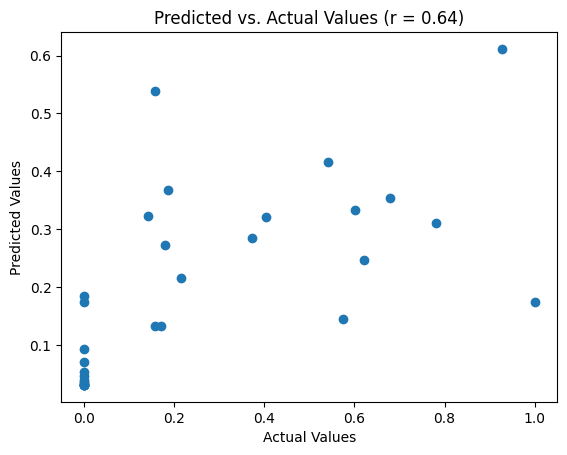

Mean Absolute Error (MAE): 0.16456293274229516
Mean Squared Error (MSE): 0.059701401409852244
R-squared (R2): 0.3617580228341587
Root Mean Squared Error (RMSE): 0.24433870223493503


In [12]:
#Prepare the data for multiple regression model
x_a =df1 [['Product Visitors (Visit)','Product Page Views','Items Visited','Search Clicks']] # Independent Variable
y_a = df1['Sales (Confirmed Order) (MYR)'] #Dependent Variable

x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(x_a,y_a,test_size=0.2, random_state=42)

#Create a linear regressioin model
model_a = LinearRegression()
#train the model
model_a.fit(x_train_a, y_train_a)

y_pred_a = model_a.predict(x_test_a)

#Plot the graph for predicted vs actual values

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter (y_test_a, y_pred_a)
plt.xlabel ('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test_a, y_pred_a)[0], 2))
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_a = mean_absolute_error(y_test_a, y_pred_a)
print(f"Mean Absolute Error (MAE): {mae_a}")

# Calculate Mean Squared Error (MSE)
mse_a = mean_squared_error(y_test_a, y_pred_a)
print(f"Mean Squared Error (MSE): {mse_a}")

# Calculate R-squared (R2)
r2_a = r2_score(y_test_a, y_pred_a)
print(f"R-squared (R2): {r2_a}")


rmse_a = np.sqrt(mean_squared_error(y_test_a, y_pred_a))
print(f"Root Mean Squared Error (RMSE): {rmse_a}")



In Multiple Linear Regression, the Pearson correlation coefficient is commonly used to assess the relationship between the predicted values and the actual values, rather than measuring the linear relationship between each independent variable and the dependent variable individually, as done in Simple Linear Regression. Also, it is normally called multiple correlation coefficient. 

From this we can see that the result of r = 0.64 indicates that this is a stong positive linear relationship between the predicted values and the actual values. 

The R-squared value of 0.3617 reveals that approximately 36.17% of the total variability in sales can be explained by the variation in the percentage of new and repeat buyers. However, the presence of other unaccounted factors contributes to the remaining 63.83% of variability.

The Mean Absolute Error (MAE: 0.1646), Mean Squared Error (MSE: 0.0597), and Root Mean Squared Error (RMSE: 0.2443) are all relatively low, suggesting reasonable predictive accuracy.

Insight: Sales are influenced by the number of items visited and product page views.

Action: Optimize product pages with better images, detailed descriptions, and customer reviews to improve conversion rates.

Strategy: Conduct A/B testing on product pages to determine which elements most positively impact sales, and adjust the website design accordingly.

Insight: Product views and search clicks may provide insight into popular products.

Action: Use this data to manage inventory more effectively, ensuring that high-demand products are well-stocked.

Strategy: Develop a responsive supply chain strategy that can adapt to changes in product popularity as indicated by the data.

Optimizing the Online Experience: Product page views and visits have a strong relationship with sales. The company should invest in optimizing the online user experience, ensuring that the website is user-friendly, mobile-responsive, and has fast loading times. This could involve A/B testing different page layouts to see which leads to more sales.

Conversion Rate Optimization: Given the relationship between sales and add-to-cart rates, focusing on conversion rate optimization (CRO) could be very fruitful. Analyzing the point at which potential customers abandon their carts could provide insights into what changes could be made to increase sales. This might include streamlining the checkout process, offering free shipping, or providing immediate online assistance through chatbots.



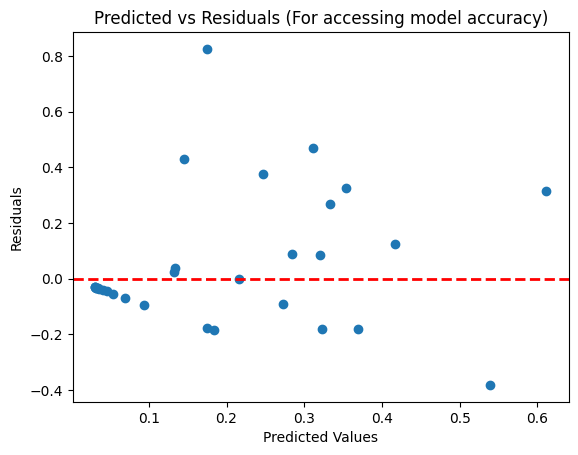

In [13]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_a = y_test_a - y_pred_a

# Plot residuals against predicted values
plt.scatter(y_pred_a, residuals_a)
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

The randomized order of dots above and below the y=0 line can define that this model is making errors in a way that is not systematically biased across all predicted values, which is a positive sign. 

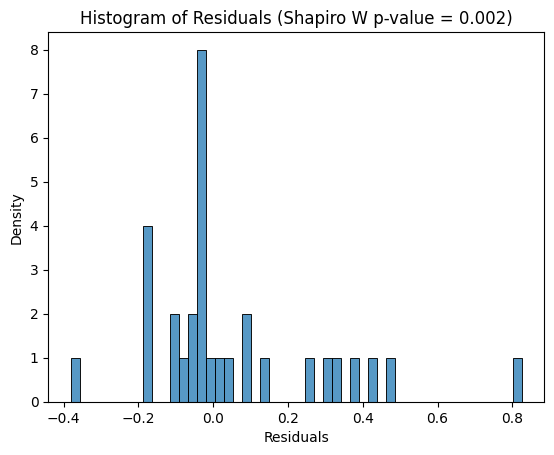

In [14]:
# Create a density plot of the residuals.
# Seaborn for data visualisation
import seaborn as sns
from scipy.stats import shapiro
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_a - y_pred_a), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_a - y_pred_a)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

# Step 4b: Feature Selection
For Part b, the analysis will be determine number of new and return customer 

In [15]:
# DataFrame for objective 2
df2 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Visitors (Visit)', 'Product Page Views','Items Visited', 'Product Bounce Visitors', 'Product Bounce Rate',
       'Search Clicks', 'Likes', 'Product Visitors (Add to Cart)','Units (Add to Cart)', 'Conversion Rate (Add to Cart)',
       'Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed','Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)',
       'Buyers (Confirmed Order)', 'Units (Confirmed Order)','Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)',
       'Numbers of buyers', 'Numbers of new buyers','Numbers of existing buyers']

df2.drop(columns=drop_columns, inplace=True)

display(df2)

,Date,Sales (Confirmed Order) (MYR),Percentage of new buyers,Percentage of repeat buyers
0,2023-05-01,0.00,0.000000,0.000000
1,2023-05-02,58.90,0.000000,1.000000
2,2023-05-03,0.00,0.000000,0.000000
3,2023-05-04,0.00,0.000000,0.000000
4,2023-05-05,0.00,0.000000,0.000000
...,...,...,...,...
148,2023-09-26,1305.30,0.739726,0.260274
149,2023-09-27,502.69,0.692308,0.307692
150,2023-09-28,629.92,0.818182,0.181818
151,2023-09-29,433.53,0.750000,0.250000


# Step 5b: Clean the data by dentifying and handling missing value, redundancy and outliers

In [16]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df2.isna().sum())

Find missing value of each column using isna()
Date                             0
Sales (Confirmed Order) (MYR)    0
Percentage of new buyers         0
Percentage of repeat buyers      0
dtype: int64


Based on above output, we found out that there are no missing value in the dataset, so we do not need to delete or drop any row.

In [17]:
#Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df2.duplicated().sum()
duplicate_columns = df2.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are no duplicate data in this dataset, so there are no redundancy.

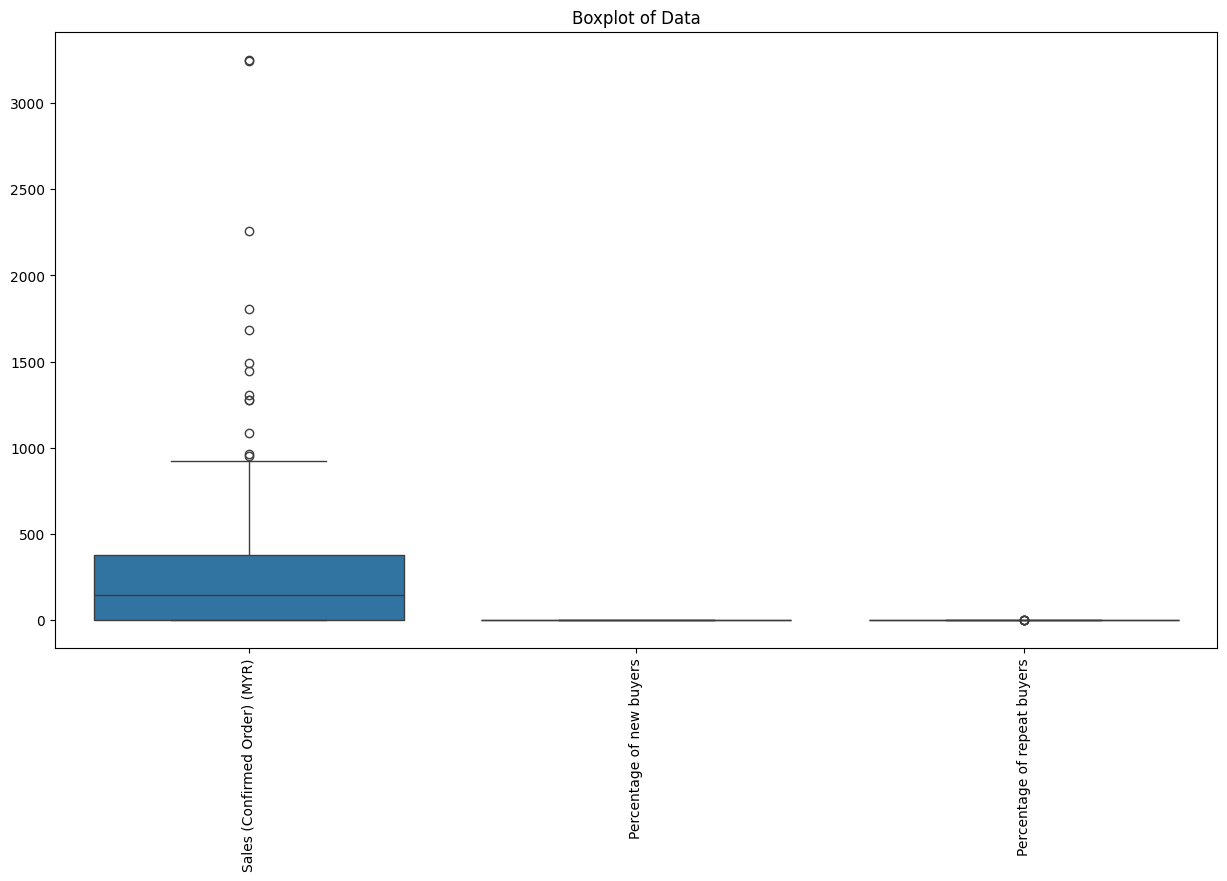

In [18]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf2 = df2.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf2)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot that used to identify the outliers in the datasets.

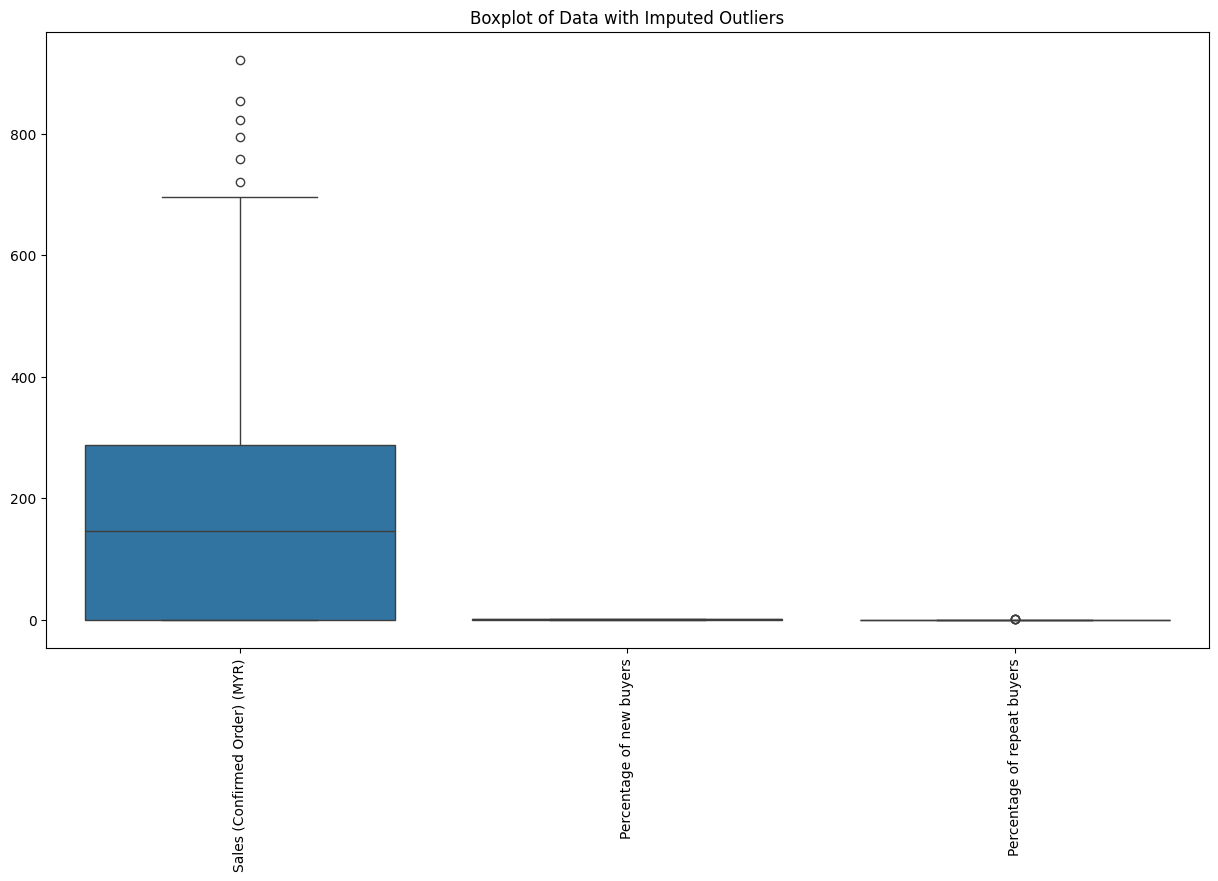

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'outliersdf' is your original DataFrame

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf2.quantile(0.25, numeric_only=True)
Q3 = outliersdf2.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf2, q1, q3, iqr):
    for col in outliersdf2.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf2[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf2[col] = np.where((outliersdf2[col] < lower_bound) | (outliersdf2[col] > upper_bound), median_value, outliersdf2[col])
    return outliersdf2

# Impute outliers in the DataFrame
df_imputed2 = impute_outlier_with_median(outliersdf2.copy(), Q1, Q3, IQR)


df2 = df_imputed2.copy()
# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed2)
plt.title("Boxplot of Data with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()


The above figure is the boxplot of the dataset after detection and removal of outliers.

In [20]:
# Now you can display df2 with cleaned data
display(df2)


,Date,Sales (Confirmed Order) (MYR),Percentage of new buyers,Percentage of repeat buyers
0,2023-05-01,0.00,0.000000,0.000000
1,2023-05-02,58.90,0.000000,0.000000
2,2023-05-03,0.00,0.000000,0.000000
3,2023-05-04,0.00,0.000000,0.000000
4,2023-05-05,0.00,0.000000,0.000000
...,...,...,...,...
148,2023-09-26,145.60,0.739726,0.260274
149,2023-09-27,502.69,0.692308,0.307692
150,2023-09-28,629.92,0.818182,0.181818
151,2023-09-29,433.53,0.750000,0.250000


# Step 5b: Encode the categorical data

In [21]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes
print(df2.dtypes)

Date                             datetime64[ns]
Sales (Confirmed Order) (MYR)           float64
Percentage of new buyers                float64
Percentage of repeat buyers             float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 6b: Feature Scaling
Scale down the numbers in the dataset
 We chose MinMaxScaler over other scaling methods due to its range from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

In [22]:
# Extract the date column
from sklearn.preprocessing import MinMaxScaler

date_column = df2.iloc[:, 0]

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df2.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df2.columns[1:])
minmax_frame.insert(0, df2.columns[0], date_column)

# Print some rows
print(minmax_frame)

df2 = minmax_frame.copy()

          Date  Sales (Confirmed Order) (MYR)  Percentage of new buyers   
0   2023-05-01                       0.000000                  0.000000  \
1   2023-05-02                       0.063885                  0.000000   
2   2023-05-03                       0.000000                  0.000000   
3   2023-05-04                       0.000000                  0.000000   
4   2023-05-05                       0.000000                  0.000000   
..         ...                            ...                       ...   
148 2023-09-26                       0.157923                  0.739726   
149 2023-09-27                       0.545235                  0.692308   
150 2023-09-28                       0.683233                  0.818182   
151 2023-09-29                       0.470221                  0.750000   
152 2023-09-30                       0.168899                  0.666667   

     Percentage of repeat buyers  
0                       0.000000  
1                       0.000

# Step 7b: Splitting the dataset, training and accuracy

The Simple Linear Regression model below is used to analyze the relationship between the percentage of new buyers and sales(confirmed order) (MYR). Scatter plots and regression lines are then plotted to visualize the results. Pearson's correlation coefficient is used to measure the strength and direction of a linear relationship between two variables.

Intercept Value:  0.028821072304435008
Coefficient:  [0.27703444]


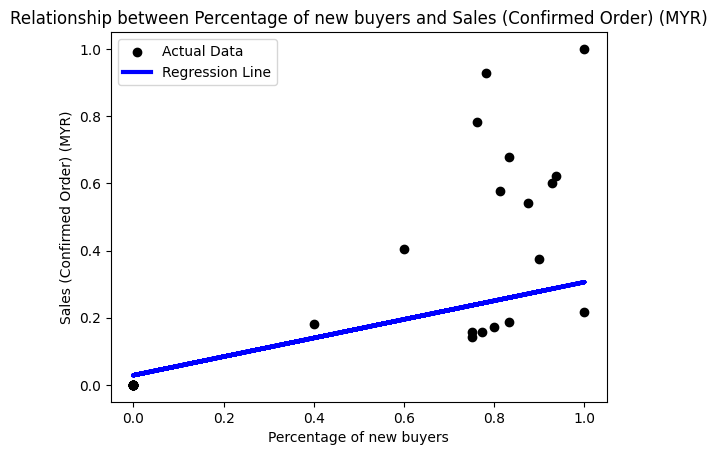

Pearson Correlation Coefficient (r): 0.5624749087808132
Mean Absolute Error (MAE): 0.1557287631083225
Mean Squared Error (MSE): 0.061653663866352265
R-squared (R2): 0.34088722548671835
Root Mean Squared Error (RMSE): 0.24830155832445408


In [23]:
#Simple Linear Regression to determine the relationship between the percentage of new buyers and the sales in confirmed order

x_b1 = df2['Percentage of new buyers']
y_b1 = df2['Sales (Confirmed Order) (MYR)']


# Split the data into training and testing sets
x_train_b1, x_test_b1, y_train_b1, y_test_b1 = train_test_split(x_b1.values.reshape(-1, 1), y_b1, test_size=0.20, random_state=42)

# Create a linear regression model
model_b1 = LinearRegression()

model_b1 .fit (x_train_b1, y_train_b1)

y_pred_b1 = model_b1 .predict(x_test_b1)
# Extract the Intercept Value, Y
# identify interception points
intercept_b1 = model_b1 .intercept_

# Extract the value of Coefficient, C
 # identify coefficient values
coefficient_b1 = model_b1 .coef_

print ("Intercept Value: ", intercept_b1)
print ("Coefficient: ", coefficient_b1)

# Train the model

# Plot the actual data and regression line
plt.scatter(x_test_b1, y_test_b1, color='black', label='Actual Data')
plt.plot(x_test_b1, y_pred_b1, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Percentage of new buyers')
plt.ylabel('Sales (Confirmed Order) (MYR)')
plt.title('Relationship between Percentage of new buyers and Sales (Confirmed Order) (MYR)')
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient (r) between variables
correlation_coefficient, _ = pearsonr(x_b1, y_b1)
print(f"Pearson Correlation Coefficient (r): {correlation_coefficient}")

# Calculate Mean Absolute Error (MAE)
mae_b1 = mean_absolute_error(y_test_b1, y_pred_b1)
print(f"Mean Absolute Error (MAE): {mae_b1}")

# Calculate Mean Squared Error (MSE)
mse_b1 = mean_squared_error(y_test_b1, y_pred_b1)
print(f"Mean Squared Error (MSE): {mse_b1}")

# Calculate R-squared (R2)
r2_b1 = r2_score(y_test_b1, y_pred_b1)
print(f"R-squared (R2): {r2_b1}")


rmse_b1 = np.sqrt(mean_squared_error(y_test_b1, y_pred_b1))
print(f"Root Mean Squared Error (RMSE): {rmse_b1}")


The result of 0.5628 shows that there is a moderate positive linear relationship between the percentage of new buyers and sales in confirmed orders in MYR. The positive value indicates that as the number of new buyers increases, there is a tendency for sales in confirmed orders to increase, though the relationship is not particularly strong. 

The R-squared value of 0.3409 reveals that approximately 34.1% of the total variability in sales can be explained by the variation in the percentage of new buyers. This implies that while the presence of new buyers is a significant factor, 65.9% of the variability is influenced by other factors not considered in our model.

The Mean Absolute Error (MAE: 0.1557), Mean Squared Error (MSE: 0.0617), and Root Mean Squared Error (RMSE: 0.2483) are all relatively low, suggesting reasonable predictive accuracy.

The analysis shows a moderate to strong relationship between sales and the percentage of new buyers. This implies that efforts to attract new customers are yielding positive results. Therefore, targeted marketing campaigns focusing on demographics that are underrepresented in the current customer base could help to increase the number of new buyers. Additionally, personalized marketing strategies could be developed for repeat buyers to encourage brand loyalty and repeat purchases.

Insight: The analysis indicated that new buyers have a moderate positive correlation with sales.

Action: Develop targeted marketing campaigns aimed at attracting new customers. This could include social media advertising, collaborations with influencers, or offering first-time buyer discounts.

Strategy: Use the customer flow data to identify peak times and channels that attract the most visitors, then align marketing campaigns to be most aggressive during these periods.

Shapiro-Wilk test to assess whether the residuals follow a normal distribution

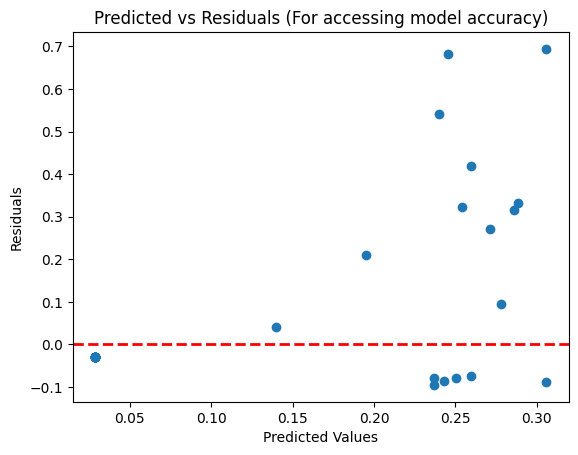

In [39]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_b1 = y_test_b1 - y_pred_b1 

# Plot residuals against predicted values
plt.scatter(y_pred_b1 , residuals_b1 )
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

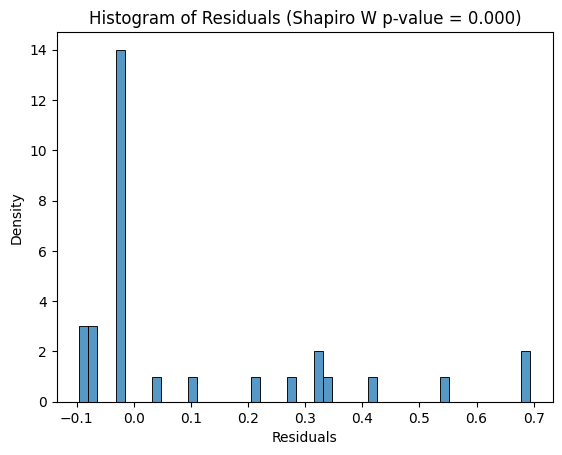

In [24]:
sns.histplot((y_test_b1 - y_pred_b1), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_b1 - y_pred_b1)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

The p-value is 0.000, which is less than 0.05. Therefore, the conclusion is that the residuals are not normally distributed based on the results of the Shapiro-Wilk test. 

Here Simple Linear Regression model is also used to analyze the relationship between the percentage of repeat buyers and sales(confirmed order) (MYR). Scatter plots and regression lines are then plotted to visualize the results. Pearson's correlation coefficient is used to measure the strength and direction of a linear relationship between two variables.

Intercept Value:  0.1557999404270553
Coefficient:  [0.21074284]


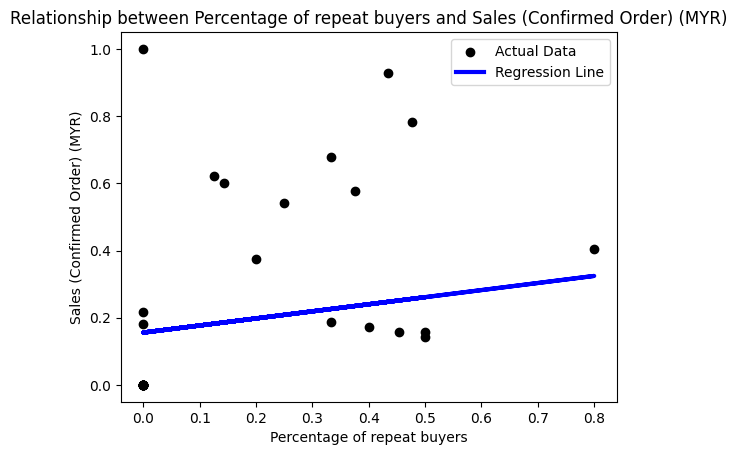

Pearson Correlation Coefficient (r): 0.29567553511225725
Mean Absolute Error (MAE): 0.22513521776646409
Mean Squared Error (MSE): 0.08615952543290184
R-squared (R2): 0.07890561083393577
Root Mean Squared Error (RMSE): 0.29352942856364816


In [25]:
#Existing Buyer Code

# Select independent variable (X) and dependent variable (y)
x_b2 = df2['Percentage of repeat buyers']
y_b2 = df2['Sales (Confirmed Order) (MYR)']

# Split dataset into training and testing sets
x_train_b2, x_test_b2, y_train_b2, y_test_b2 = train_test_split(x_b2.values.reshape(-1,1), y_b2, test_size=0.2, random_state=42)

#Initiate Linear Regression
model_b2 = LinearRegression()

model_b2.fit (x_train_b2, y_train_b2)

y_pred_b2 = model_b2.predict(x_test_b2)
# Extract the Intercept Value, Y
# identify interception points
intercept_b2 = model_b2.intercept_

# Extract the value of Coefficient, C
 # identify coefficient values
coefficient_b2 = model_b2.coef_

print ("Intercept Value: ", intercept_b2)
print ("Coefficient: ", coefficient_b2)

# Visualising the regression line
plt.scatter(x_test_b2, y_test_b2, color='black', label='Actual Data')
plt.plot(x_test_b2, y_pred_b2, color='blue', linewidth=3, label='Regression Line')
plt.title('Relationship between Percentage of repeat buyers and Sales (Confirmed Order) (MYR)')
plt.xlabel('Percentage of repeat buyers')
plt.ylabel('Sales (Confirmed Order) (MYR)')
plt.legend()
plt.show()

# Calculate Pearson correlation coefficient (r) between variables
correlation_coefficient, _ = pearsonr(x_b2, y_b2)
print(f"Pearson Correlation Coefficient (r): {correlation_coefficient}")


# Calculate Mean Absolute Error (MAE)
mae_b2 = mean_absolute_error(y_test_b2, y_pred_b2)
print(f"Mean Absolute Error (MAE): {mae_b2}")

# Calculate Mean Squared Error (MSE)
mse_b2 = mean_squared_error(y_test_b2, y_pred_b2)
print(f"Mean Squared Error (MSE): {mse_b2}")

# Calculate R-squared (R2)
r2_b2 = r2_score(y_test_b2, y_pred_b2)
print(f"R-squared (R2): {r2_b2}")


rmse_b2 = np.sqrt(mean_squared_error(y_test_b2, y_pred_b2))
print(f"Root Mean Squared Error (RMSE): {rmse_b2}")


The result of 0.2957 shows that there is a weak positive linear relationship between the percentage of repeat buyers and sales in confirmed orders in MYR. The positive value indicates that as the number of repeat buyers increases, there is a tendency for sales in confirmed orders to increase, though the relationship is weak. 

The R-squared value of 0.07 reveals that approximately 7% of the total variability in sales can be explained by the variation in the percentage of repeat buyers. This implies that while the presence of repeat buyers is merly a small factor, 93% of the variability is influenced by other factors not considered in our model.

The Mean Absolute Error (MAE: 0.2251), Mean Squared Error (MSE: 0.0862), and Root Mean Squared Error (RMSE: 0.2935) are all relatively low, suggesting reasonable predictive accuracy.


With a weaker relationship between repeat buyers and sales, there's an opportunity to improve customer retention. Implementing loyalty programs, such as rewards for frequent purchases, personalized discounts, or exclusive offers for returning customers, could enhance repeat purchase rates.

This insight underscores the potential and needs for improving the chili's flavour or more offer to attract customers to buy again, thereby boosting sales in confirmed orders. 

Insight: Repeat buyers have a weak positive correlation with sales, suggesting the need for improved retention strategies.

Action: Implement a loyalty program that rewards repeat purchases with discounts, exclusive offers, or early access to new products.

Strategy: Analyze the purchasing patterns of repeat buyers to tailor the loyalty program rewards to their preferences.

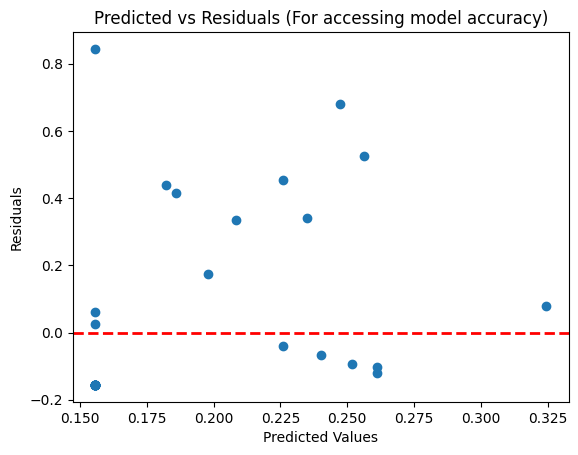

In [42]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_b2 = y_test_b2 - y_pred_b2

# Plot residuals against predicted values
plt.scatter(y_pred_b2 , residuals_b2 )
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

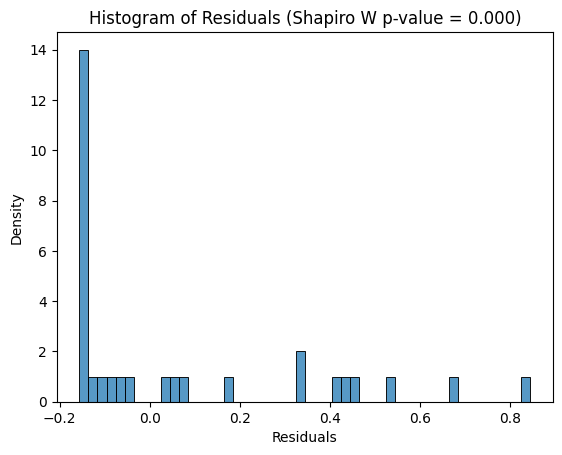

In [26]:
# Create a density plot of the residuals.
# Seaborn for data visualisation
import seaborn as sns
from scipy.stats import shapiro
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_b2 - y_pred_b2), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_b2 - y_pred_b2)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

The p-value is 0.000, which is less than 0.05. Therefore, the conclusion is that the residuals are not normally distributed based on the results of the Shapiro-Wilk test. 

Here to combine the 2 Single Linear Regression above, Multiple Linear Regression model is used to analyze the relationship between the percentage of new and repeat buyers and sales(confirmed order) (MYR). Scatter plots and regression lines are then plotted to visualize the results. Pearson's correlation coefficient is used to measure the strength and direction of a linear relationship between two variables.

Intercept Value:  0.011845306081999712
Coefficient:  [0.25974182 0.13880796]


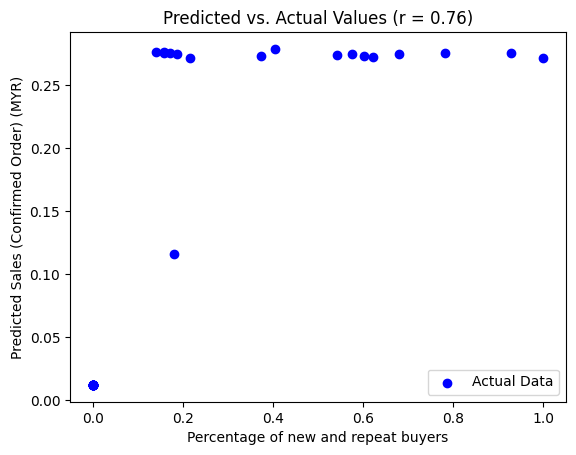

Mean Absolute Error (MAE): 0.148739393014352
Mean Squared Error (MSE): 0.06020542214623809
R-squared (R2): 0.3563697541549179
Root Mean Squared Error (RMSE): 0.24536793218804712


In [27]:
#MLR for Percentage of new buyers and Percentage of repeat buyers

# Select independent variable (X) and dependent variable (y)
x_bmlr = df2[['Percentage of new buyers', 'Percentage of repeat buyers']]
y_bmlr = df2['Sales (Confirmed Order) (MYR)']

# Split dataset into training and testing sets
x_train_bmlr, x_test_bmlr, y_train_bmlr, y_test_bmlr = train_test_split(x_bmlr.values.reshape(-1, 2), y_bmlr, test_size=0.2, random_state=42)

# Initiate Linear Regression
model_bmlr = LinearRegression()

# Fit model to train data
model_bmlr.fit(x_train_bmlr, y_train_bmlr)

y_pred_bmlr = model_bmlr.predict(x_test_bmlr)

# Extract Intercept Value
intercept_bmlr = model_bmlr.intercept_

# Extract Coefficient Values
coefficients_bmlr = model_bmlr.coef_

print ("Intercept Value: ", intercept_bmlr)
print ("Coefficient: ", coefficients_bmlr)

# Visualize scatter plot for predictions vs actual values
plt.scatter(y_test_bmlr, y_pred_bmlr, color='blue', label='Actual Data')

plt.xlabel('Percentage of new and repeat buyers')
plt.ylabel('Predicted Sales (Confirmed Order) (MYR)')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test_bmlr, y_pred_bmlr)[0]))
plt.legend()
plt.show()


# Calculate Mean Absolute Error (MAE)
mae_bmlr = mean_absolute_error(y_test_bmlr, y_pred_bmlr)
print(f"Mean Absolute Error (MAE): {mae_bmlr}")

# Calculate Mean Squared Error (MSE)
mse_bmlr = mean_squared_error(y_test_bmlr, y_pred_bmlr)
print(f"Mean Squared Error (MSE): {mse_bmlr}")

# Calculate R-squared (R2)
r2_bmlr = r2_score(y_test_bmlr, y_pred_bmlr)
print(f"R-squared (R2): {r2_bmlr}")


rmse_bmlr = np.sqrt(mean_squared_error(y_test_bmlr, y_pred_bmlr))
print(f"Root Mean Squared Error (RMSE): {rmse_bmlr}")

In Multiple Linear Regression, the Pearson correlation coefficient is commonly used to assess the relationship between the predicted values and the actual values, rather than measuring the linear relationship between each independent variable and the dependent variable individually, as done in Simple Linear Regression. Also, it is normally called multiple correlation coefficient. 

The result of 0.76 shows a strong linear relationship between the overall predictions of your MLR model and the actual outcomes. This indicates that the model is performing well in explaining the variation in the data.

The R-squared value of 0.3563 reveals that approximately 35.6% of the total variability in sales can be explained by the variation in the percentage of new and repeat buyers. However, the presence of other unaccounted factors contributes to the remaining 64.4% of variability.

The Mean Absolute Error (MAE: 0.1487), Mean Squared Error (MSE: 0.0602), and Root Mean Squared Error (RMSE: 0.2454) are all relatively low, suggesting reasonable predictive accuracy.

Here are the metric obtained from the Single Linear Regression:
First Model
1. Mean Absolute Error (MAE): 0.1557287631083225
2. Mean Squared Error (MSE): 0.061653663866352265
3. R-squared (R2): 0.34088722548671835
4. Root Mean Squared Error (RMSE): 0.24830155832445408

Second Model
1. Mean Absolute Error (MAE): 0.22513521776646409
2. Mean Squared Error (MSE): 0.08615952543290184
3. R-squared (R2): 0.07890561083393577
4. Root Mean Squared Error (RMSE): 0.29352942856364816

For this Multiple Linear Regression it has the lowest MAE, MSE and RMSE while R-squared is the highest. This state that Multiple Linear Regression model is better and more suitable than Single Linear Regression model in this case.


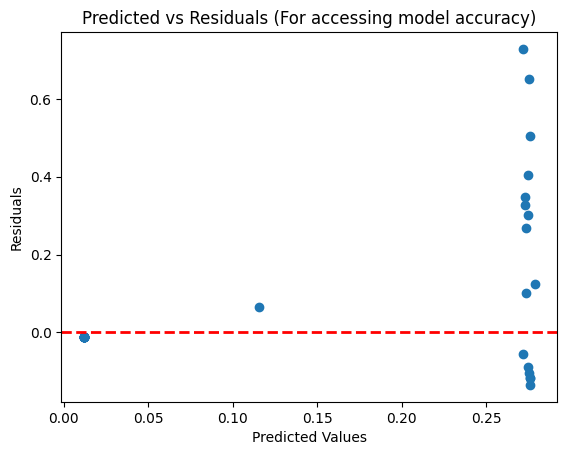

In [43]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_bmlr = y_test_bmlr- y_pred_bmlr

# Plot residuals against predicted values
plt.scatter(y_pred_bmlr , residuals_bmlr )
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

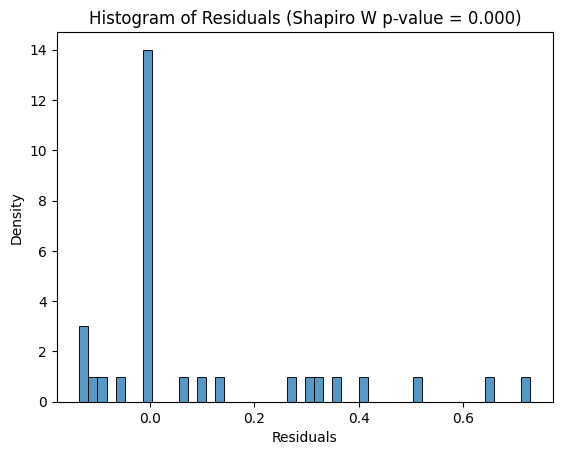

In [44]:
# Create a density plot of the residuals.
# Seaborn for data visualisation
import seaborn as sns
from scipy.stats import shapiro
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_bmlr - y_pred_bmlr), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_b2 - y_pred_b2)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

# Step 9: Combine all Multiple Linear Regression as one Multiple Linear Regression
Here to combine the 2 Multiple Linear Regression above which is from Part A and Part B, Multiple Linear Regression model is used to analyze customer behaviour and sales(confirmed order) (MYR). Scatter plots and regression lines are then plotted to visualize the results. Pearson's correlation coefficient is used to measure the strength and direction of a linear relationship between two variables.

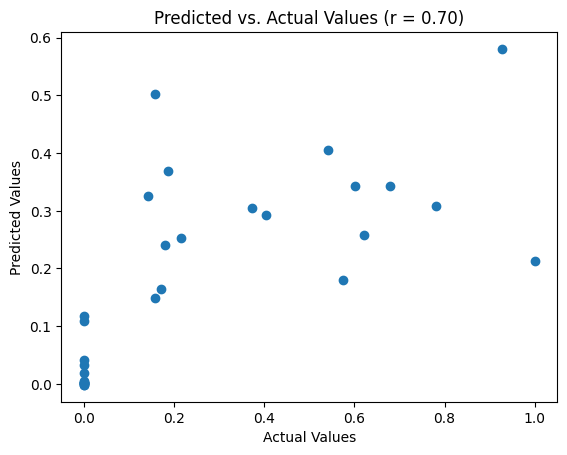

Mean Absolute Error (MAE): 0.14307636769386978
Mean Squared Error (MSE): 0.05440887377661004
R-squared (R2): 0.4183381569863851
Root Mean Squared Error (RMSE): 0.23325709801978167


In [28]:
# Concatenate columns from both datasets
x_9 = pd.concat([df1[['Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Search Clicks']],
               df2[['Percentage of new buyers', 'Percentage of repeat buyers']]], axis=1)

# Target variable
y_9 = df1['Sales (Confirmed Order) (MYR)']

# Split the data into training and testing sets
x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(x_9, y_9, test_size=0.2, random_state=42)

# Create a linear regression model
model_9 = LinearRegression()

# Train the model
model_9.fit(x_train_9, y_train_9)

# Make predictions on the test set
y_pred_9 = model_9.predict(x_test_9)

# Plotting the predicted vs actual values
plt.scatter(y_test_9, y_pred_9)
plt.xlabel ('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test_9, y_pred_9)[0], 2))
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_9 = mean_absolute_error(y_test_9, y_pred_9)
print(f"Mean Absolute Error (MAE): {mae_9}")

# Calculate Mean Squared Error (MSE)
mse_9 = mean_squared_error(y_test_9, y_pred_9)
print(f"Mean Squared Error (MSE): {mse_9}")

# Calculate R-squared (R2)
r2_9 = r2_score(y_test_9, y_pred_9)
print(f"R-squared (R2): {r2_9}")


rmse_9 = np.sqrt(mean_squared_error(y_test_9, y_pred_9))
print(f"Root Mean Squared Error (RMSE): {rmse_9}")

The result of 0.70 shows a strong linear relationship between the overall predictions of your MLR model and the actual outcomes. This indicates that the model is performing well in explaining the variation in the data. However this value is lower before incorporating customer behavior. This means that repeat customer plays a important part in the overall sales.

The R-squared value of 0.4183 reveals that approximately 41.83% of the total variability in sales can be explained by the variation in the customer behaviour. However, the presence of other unaccounted factors contributes to the remaining 58.17% of variability.

The Mean Absolute Error (MAE: 0.1430), Mean Squared Error (MSE: 0.0544), and Root Mean Squared Error (RMSE: 0.2333) are all relatively low, suggesting reasonable predictive accuracy.

Here is the metric obtained from the Multiple Linear Regression from Sales and Percentage of New and Repeat Customer

1. Mean Absolute Error (MAE): 0.148739393014352
2. Mean Squared Error (MSE): 0.06020542214623809
3. R-squared (R2): 0.3563697541549179
4. Root Mean Squared Error (RMSE): 0.24536793218804712

For this Multiple Linear Regression it has a lower MAE, MSE, RMSE while it has a significant higher R2 than the Multiple Multiple Linear Regression from Sales and Percentage of New and Repeat Customer. This means that after incoporating more factor like Product Visitors, Product Page View, Items Visited and more the model becomes more accurate.

This help us to indentify that the best way to increase sales is to attract customer more, as a better marketing will attract more customer and increase sales.

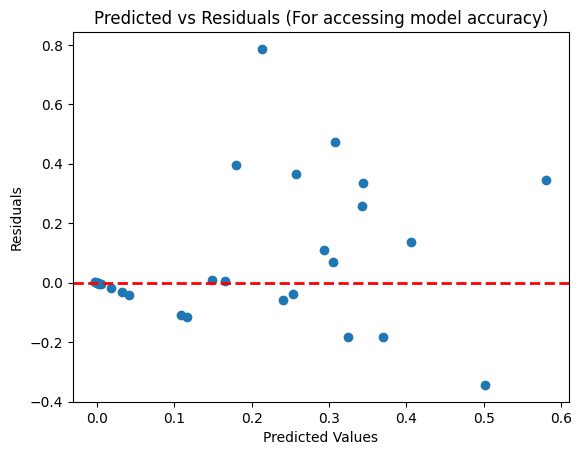

In [45]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_9 = y_test_9- y_pred_9

# Plot residuals against predicted values
plt.scatter(y_pred_9 , residuals_9 )
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

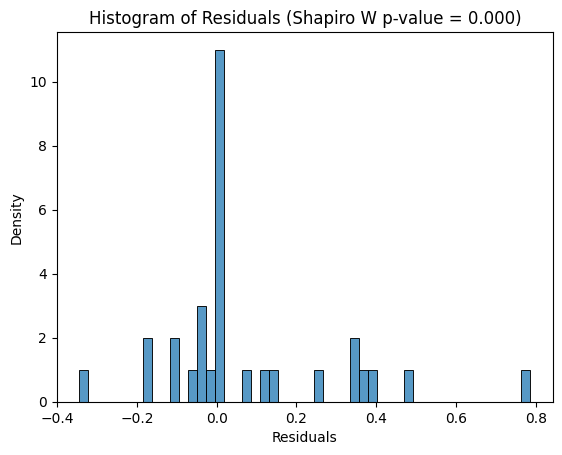

In [46]:
# Create a density plot of the residuals.
# Seaborn for data visualisation
import seaborn as sns
from scipy.stats import shapiro
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_9 - y_pred_9), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_b2 - y_pred_b2)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

Here RNN is use and the date column is used.

Epoch 1/100
4/4 [==============================] - 6s 11ms/step - loss: 0.0833 - mae: 0.1946
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0696 - mae: 0.1750
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0594 - mae: 0.1589
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0488 - mae: 0.1426
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0419 - mae: 0.1367
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0356 - mae: 0.1383
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0336 - mae: 0.1463
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0339 - mae: 0.1548
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0342 - mae: 0.1585
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0332 - mae: 0.1552
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0319

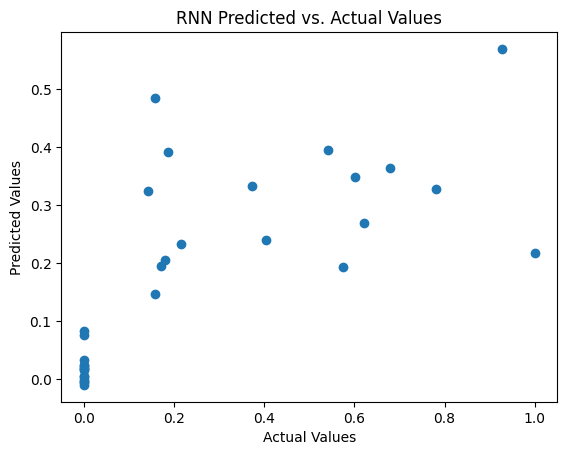

RNN Mean Absolute Error (MAE): 0.14077710902869336
RNN Mean Squared Error (MSE): 0.05262321714954361
RNN R-squared (R2): 0.43742784314591443
RNN Root Mean Squared Error (RMSE): 0.22939750903081665


In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

# Concatenate columns from both datasets, including the extracted date features
x_9rnn = pd.concat([df1[['Year', 'Month', 'Day', 'Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Search Clicks']],
               df2[['Percentage of new buyers', 'Percentage of repeat buyers']]], axis=1)

y_9rnn = df1['Sales (Confirmed Order) (MYR)']


# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x_9rnn)

# Reshape data for RNN: [samples, time steps, features]
x_9rnn = np.reshape(x_scaled, (x_scaled.shape[0], 1, x_scaled.shape[1]))

# Split the data into training and testing sets
x_train_9rnn, x_test_9rnn, y_train_9rnn, y_test_9rnn = train_test_split(x_9rnn, y_9rnn, test_size=0.2, random_state=42)

# Build the RNN model
model_9rnn = Sequential()
model_9rnn.add(LSTM(50, return_sequences=True, input_shape=(1, x_9rnn.shape[2])))
model_9rnn.add(LSTM(50))
model_9rnn.add(Dense(1))

# Compile the model
model_9rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
model_9rnn.fit(x_train_9rnn, y_train_9rnn, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_9rnn = model_9rnn.predict(x_test_9rnn)

# Plotting the predicted vs actual values
plt.scatter(y_test_9rnn, y_pred_9rnn)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RNN Predicted vs. Actual Values')
plt.show()

# Calculate and print metrics
mae_9rnn = mean_absolute_error(y_test_9rnn, y_pred_9rnn)
mse_9rnn = mean_squared_error(y_test_9rnn, y_pred_9rnn)
r2_9rnn = r2_score(y_test_9rnn, y_pred_9rnn)
rmse_9rnn = np.sqrt(mse_9rnn)

print(f"RNN Mean Absolute Error (MAE): {mae_9rnn}")
print(f"RNN Mean Squared Error (MSE): {mse_9rnn}")
print(f"RNN R-squared (R2): {r2_9rnn}")
print(f"RNN Root Mean Squared Error (RMSE): {rmse_9rnn}")

# Step 10: Random Forest Model
Used to capture complex non linear relationship and feature importance. This is more important

Non-linear Relationships: Random Forest can capture non-linear relationships that MLR might miss. This could reveal more complex patterns in how customer behaviors interact to influence sales, allowing for more sophisticated marketing strategies.

Robustness to Outliers: Random Forest is more robust to outliers than MLR, possibly providing a more accurate picture of the sales drivers if your data has outliers or is not normally distributed.

Actionable Strategies: With a better understanding of what drives sales, you can create more targeted strategies. For instance, if the time on site is a key feature, you might work to create more engaging content to keep customers browsing longer.
Risk Mitigation: Insights from the Random Forest model could also help in identifying potential risks or issues before they have a significant impact. For example, if a drop in a particular feature significantly

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
235 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


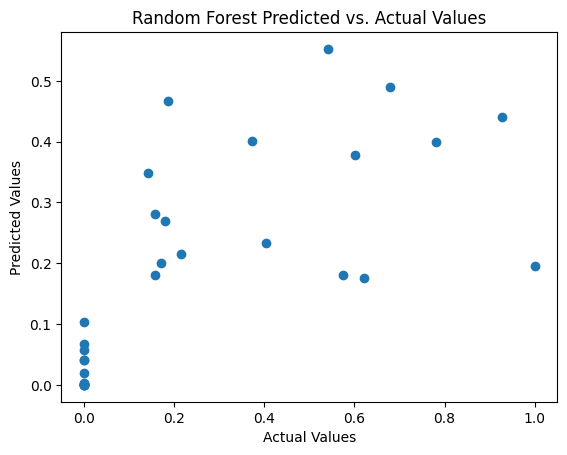

Random Forest Mean Absolute Error (MAE): 0.1363301268986781
Random Forest Mean Squared Error (MSE): 0.05378708833670329
Random Forest R-squared (R2): 0.42498539740566155
Random Forest Root Mean Squared Error (RMSE): 0.23192043535812726


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


x_10 = pd.concat([df1[['Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Search Clicks']],
               df2[['Percentage of new buyers', 'Percentage of repeat buyers']]], axis=1)

# Target variable
y_10 = df1['Sales (Confirmed Order) (MYR)']

x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x_10, y_10, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model_rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_10, y_train_10)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best parameters to create a new model
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)

# Train the model
best_rf.fit(x_train_10, y_train_10)

# Make predictions on the test set
y_pred_rf = best_rf.predict(x_test_10)

# Plotting the predicted vs actual values for Random Forest
plt.scatter(y_test_10, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predicted vs. Actual Values')
plt.show()

# Calculate and print metrics for Random Forest
mae_rf = mean_absolute_error(y_test_10, y_pred_rf)
mse_rf = mean_squared_error(y_test_10, y_pred_rf)
r2_rf = r2_score(y_test_10, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")


In [31]:
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Train the model
best_rf_model.fit(x_train_10, y_train_10)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(x_test_10)


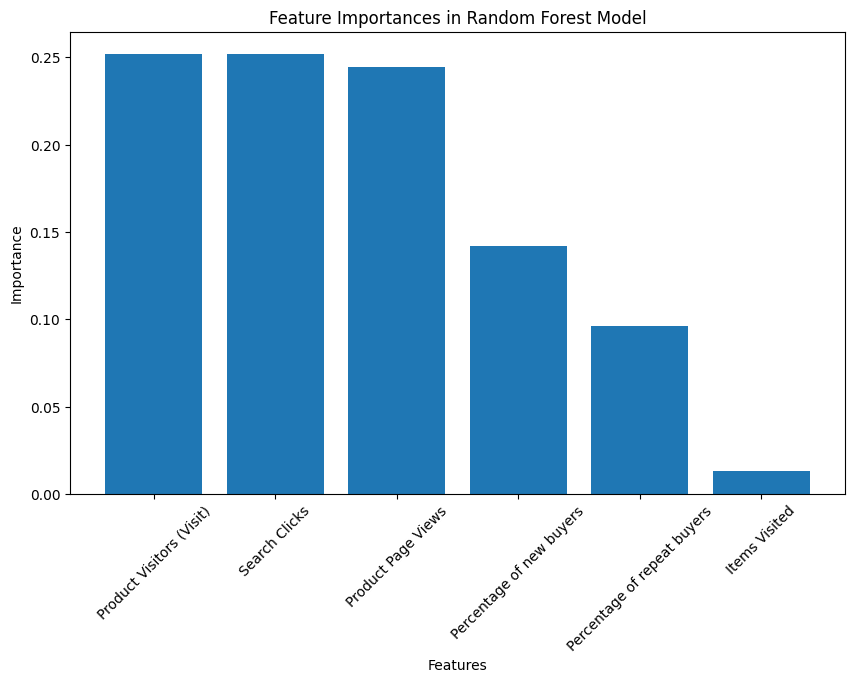

Feature Importances:
                       Feature  Importance
0     Product Visitors (Visit)    0.251914
3                Search Clicks    0.251849
1           Product Page Views    0.244263
4     Percentage of new buyers    0.142118
5  Percentage of repeat buyers    0.096425
2                Items Visited    0.013431


In [32]:
feature_importances = best_rf_model.feature_importances_
features = x_10.columns  # Make sure this refers to the correct DataFrame used for training the model
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Plotting Feature Importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=45)
plt.show()

print("Feature Importances:")
print(importance_df)


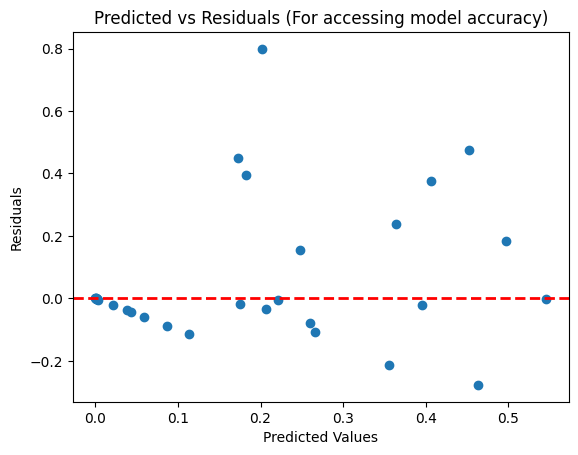

In [52]:
# Plot the graph for residuals
import matplotlib.pyplot as plt

# Calculate residuals
residuals_rf = y_test_10 - y_pred_rf

# Plot residuals against predicted values
plt.scatter(y_pred_rf, residuals_rf)
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

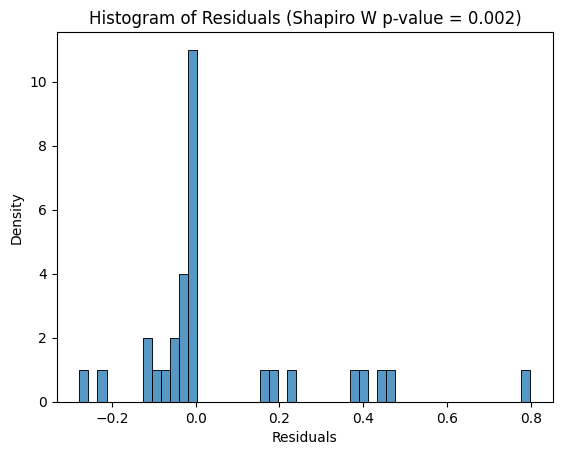

In [53]:
# Create a density plot of the residuals.
# Seaborn for data visualisation
import seaborn as sns
from scipy.stats import shapiro
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_10 - y_pred_rf), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')
# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_a - y_pred_a)[1]))
plt.show()
# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

So, making visitors click page is the most important feature. More resources should be allocated to this part

Conclusion
Customer Behavior and Sales (Part A)
The initial part of your analysis focused on customer behavior on the eCommerce platform. Key metrics such as page views, visits, and search clicks were linked to sales, which gives you an understanding of how engagement on the platform correlates with revenue. From these insights, you could:

Optimize the User Experience: Enhance the website's user interface and user experience to increase customer engagement metrics, which are directly linked to sales. A/B testing different layouts, designs, and call-to-action placements can lead to higher page views and visits.

Content Strategy: Analyze which pages or products get the most views and clicks and why. This information can guide your content strategy, allowing you to focus on popular items or improve the presentation of less-viewed products.

Search Optimization: Since search clicks were included as a feature, it's important to ensure that the search functionality is optimized. Consider implementing features like auto-complete, spell correction, and personalized suggestions.



New and Repeat Customers (Part B)
Understanding the dynamics between new and repeat customers gives you leverage to tailor marketing strategies accordingly. For instance:

Loyalty Programs: If repeat customers significantly contribute to sales, developing a loyalty program or subscription model could enhance customer retention rates.

Targeted Marketing: Create different marketing campaigns for new and existing customers. Use insights from your data to customize these campaigns, emphasizing customer acquisition for new customers and value or loyalty for repeat customers.

Combined Model Insights
After integrating all factors, you gain a comprehensive overview of how each element contributes to sales. Here's how you can act on these insights:

Holistic Marketing Strategy: Your combined model can identify which factors have the most significant impact on sales. Allocate your marketing budget accordingly, focusing on high-impact strategies that drive both traffic and conversion rates.

Product Development and Inventory Management: By understanding the full customer journey from initial visit to repeat purchase, you can make informed decisions about product development and inventory management to ensure that you're meeting customer demand.

Customer Behavior and Sales: The MLR model that includes variables from both customer behavior and new/repeat customer metrics gives you an understanding of how these factors collectively influence sales. By knowing the combined effect, you can prioritize which aspects of the customer experience need improvement to boost sales.

Resource Allocation: If certain features, like product views or repeat customer rates, have a stronger relationship with sales, you can allocate more resources to improve these areas. For instance, if product views are a strong predictor, you might invest in higher quality images or virtual try-on features.

Marketing Strategy: The combined model can help refine marketing strategies. For example, if new customer rates are a significant predictor of sales, strategies could include targeted ads to attract new customers or promotions to convert first-time site visitors into purchasers.

Customer Retention: If repeat customer rates significantly impact sales, then customer retention programs, loyalty rewards, or personalized marketing could be areas to invest in, aiming to increase repeat purchases.
Feature Importance: Random Forest provides feature importance scores, which can help identify which factors most significantly predict sales. You might find that certain predictors have a stronger influence than initially thought, which could lead to refining the focus of business strategies.

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


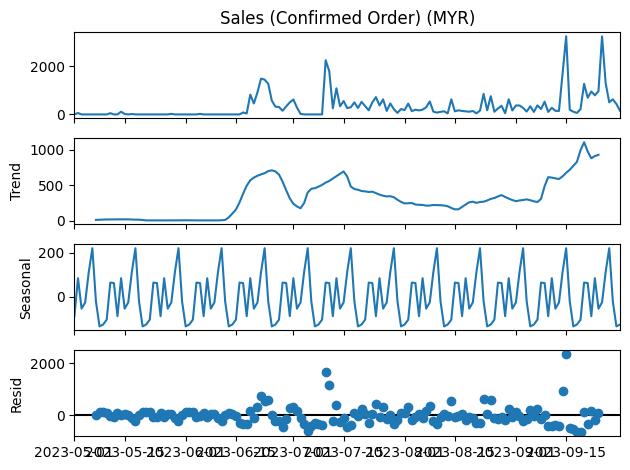

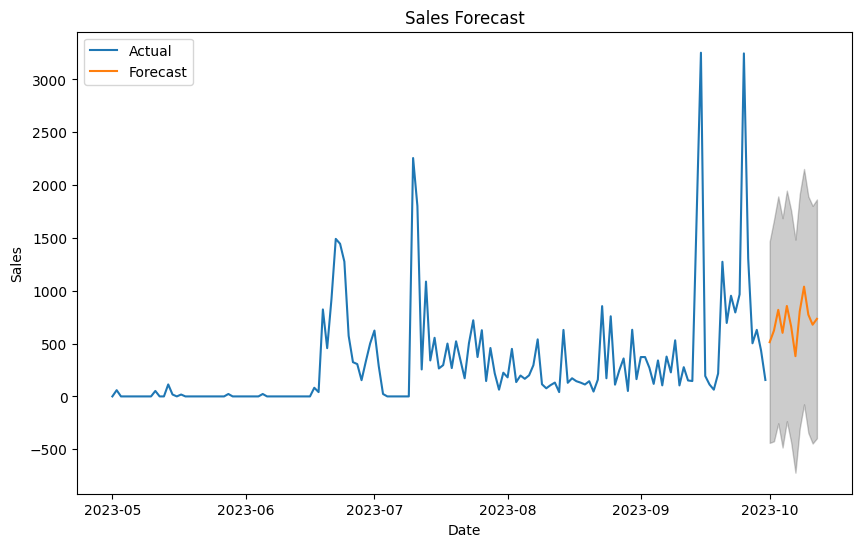

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2339.317, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2326.812, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2311.921, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2337.318, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2312.324, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2312.808, Time=0.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2313.012, Time=0.93 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2312.234, Time=0.32 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2314.671, Time=1.20 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2334.660, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2294.974, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2295.230, Time=0.21 sec
 ARIMA(0,1,2)(1,0,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1143.326
Date:                            Tue, 14 Nov 2023   AIC                           2294.652
Time:                                    09:18:28   BIC                           2306.747
Sample:                                05-01-2023   HQIC                          2299.565
                                     - 09-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3934      0.061      6.490      0.000       0.275       0.512
ma.L1         -0.9257      0.044    -20.843      0.000      -1.013      -0.839
ma.S.L12      -0.1769      0.184     -0.961      0.336      -0.538       0.184
sigma2      1.978e+05   9412.011     21.019      0.000    1.79e+05    2.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1241.69
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              17.60   Skew:                             2.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Assuming 'df' is your DataFrame and it has a 'Date' column
df = pd.read_excel('MergedFile.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Choose the relevant column for time series analysis, e.g., 'Sales (Confirmed Order) (MYR)'
sales_data = df['Sales (Confirmed Order) (MYR)']

decomposition = seasonal_decompose(sales_data, model='additive', period=12)  # adjust 'period' based on your data's seasonality
decomposition.plot()



# Example parameters (you may need to find the best parameters through experimentation)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming annual seasonality; change the last number based on your seasonality period

# Fit the SARIMA model
sarima_model = SARIMAX(sales_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Predictions
sarima_pred = sarima_results.get_forecast(steps=12)  # Adjust steps as needed
pred_conf = sarima_pred.conf_int()

# Evaluate performance (you may need to compare these predictions with actual values)
# ... (use metrics like Mean Squared Error, etc.)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data, label='Actual')
plt.plot(sarima_pred.predicted_mean.index, sarima_pred.predicted_mean, label='Forecast')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

auto_model = auto_arima(sales_data, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)
auto_model.summary()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:      Sales (Confirmed Order) (MYR)   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1044.679
Date:                            Tue, 14 Nov 2023   AIC                           2097.358
Time:                                    10:03:12   BIC                           2109.067
Sample:                                05-01-2023   HQIC                          2102.116
                                     - 09-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3879      0.067      5.811      0.000       0.257       0.519
ma.L1         -0.9250      0.049   

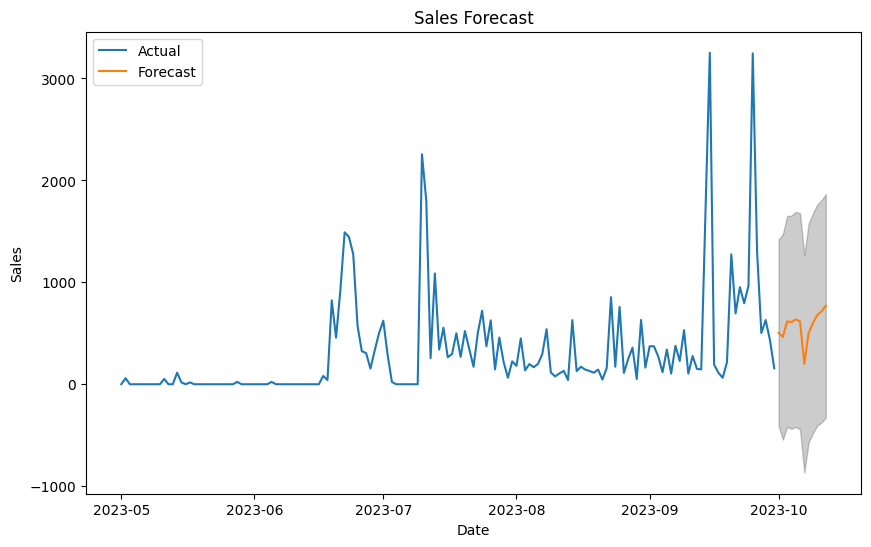

In [38]:
sarima_model = SARIMAX(sales_data,
                       order=(1, 1, 1),
                       seasonal_order=(0, 0, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit()

# Summarize the model results
print(sarima_results.summary())

# Forecasting
# sarima_pred = sarima_results.get_forecast(steps=12)  # Adjust the steps as needed
pred_conf = sarima_pred.conf_int()


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data, label='Actual')
plt.plot(sarima_pred.predicted_mean.index, sarima_pred.predicted_mean, label='Forecast')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()